In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_sub2000 = df.loc[df["Year"] < 2000]
df_up2000 = df.loc[df["Year"] >= 2000]
df_sub2000 = df_sub2000.drop_duplicates(['Name', 'Year'])
df_up2000 = df_up2000.drop_duplicates(['Name', 'Year'])

# 1

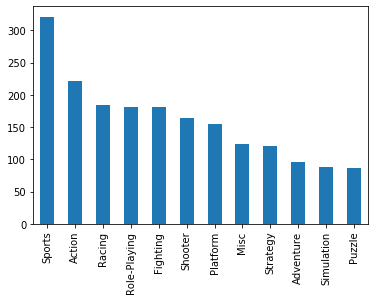

In [15]:
df_sub2000.Genre.value_counts().plot.bar()

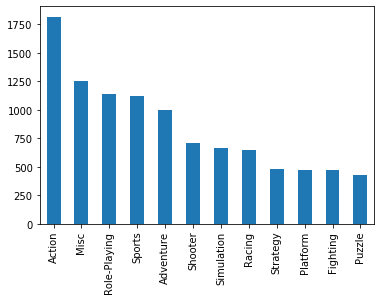

In [17]:
df_up2000.Genre.value_counts().plot.bar()

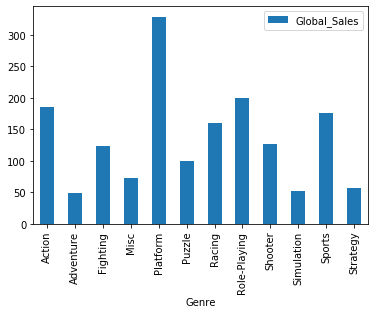

In [7]:
df_sub2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

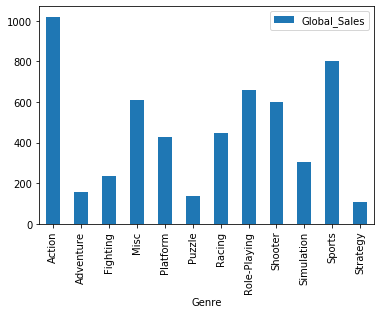

In [8]:
df_up2000.groupby('Genre').agg({'Global_Sales':'sum'}).plot.bar()

# 2

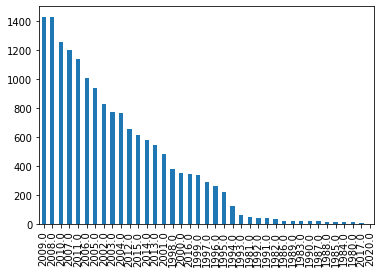

In [9]:
df.Year.value_counts().plot.bar()

# 3

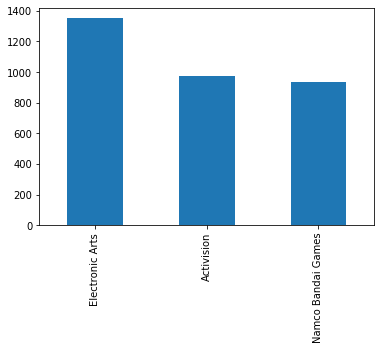

In [10]:
df_pubmany = df['Publisher'].value_counts().head(3)
df_pubmany.plot.bar()

# 4

In [11]:
df["NA_EU_JP"] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,29.68
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,27.11
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.16
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,26.35
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,27.84


In [12]:
df_b2 = df.loc[df["Year"] < 2000]
df_a2 = df.loc[df["Year"] >= 2000]

df_a2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,27.11
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.16
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,26.35
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,22.00
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,21.51
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,20.57
14,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,20.21


In [18]:
df['Percent_NA'] = df['NA_Sales']/df['Global_Sales']*100
df['Percent_EU'] = df['EU_Sales']/df['Global_Sales']*100
df['Percent_JP'] = df['JP_Sales']/df['Global_Sales']*100
df['Percent_Other'] = df['Other_Sales']/df['Global_Sales']*100

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP,Percent_NA,Percent_EU,Percent_JP,Percentage,Percent_Other
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,74.28,50.145033,35.073725,4.556442,89.775199,10.224801
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39.47,72.266402,8.896620,16.923459,98.086481,1.913519
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,32.52,44.249023,35.957566,10.580681,90.787270,9.240648
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,30.04,47.727273,33.363636,9.939394,91.030303,8.969697
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,30.38,35.926044,28.339178,32.578897,96.844119,3.187759
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,29.68,76.668870,7.468605,13.945803,98.083278,1.916722
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,27.11,37.920693,30.756415,21.659447,90.336554,9.663446
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,26.16,48.345968,31.702274,10.096485,90.144728,9.820813
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,26.35,50.978337,24.668064,16.422082,92.068484,7.896576
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,27.84,95.125397,2.225362,0.989050,98.339809,1.660191


In [26]:
# df['Percentage'] = df['Percent_NA'] + df['Percent_EU'] + df['Percent_JP']

dfpie = pd.DataFrame([df['Percent_NA'], df['Percent_EU'], df['Percent_JP'], df['Percent_Other']])
# dfpie = dfpie.cumsum()
# dfpie.plot.pie(subplots=True, figsize=(10, 10))
dfpie

,0,1,2,3,4,5,6,7,8,9,...,16588,16589,16590,16591,16592,16593,16594,16595,16596,16597
Percent_NA,50.145033,72.266402,44.249023,47.727273,35.926044,76.668870,37.920693,48.345968,50.978337,95.125397,...,100.0,0.0,0.0,100.0,100.0,100.0,100.0,0.0,0.0,100.0
Percent_EU,85.218758,81.163022,80.206588,81.090909,64.265222,84.137475,68.677108,80.048243,75.646401,97.350759,...,100.0,0.0,0.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
Percent_JP,89.775199,98.086481,90.787270,91.030303,96.844119,98.083278,90.336554,90.144728,92.068484,98.339809,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
Percent_Other,100.000000,100.000000,100.027917,100.000000,100.031878,100.000000,100.000000,99.965541,99.965059,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
